In [1]:
import yaml
from datetime import date
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from dateutil import parser
from IPython.core.display import HTML
import numpy as np

SMALL_SIZE = 12
MEDIUM_SIZE = 25
BIGGER_SIZE = 12

plt.rc('font', family='DejaVu Sans')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsiz

# Plotting all Activities in a Day

This first graph is the most simple version of the plot - literally a catch all plot of all activites that happened on a given day - without any label.

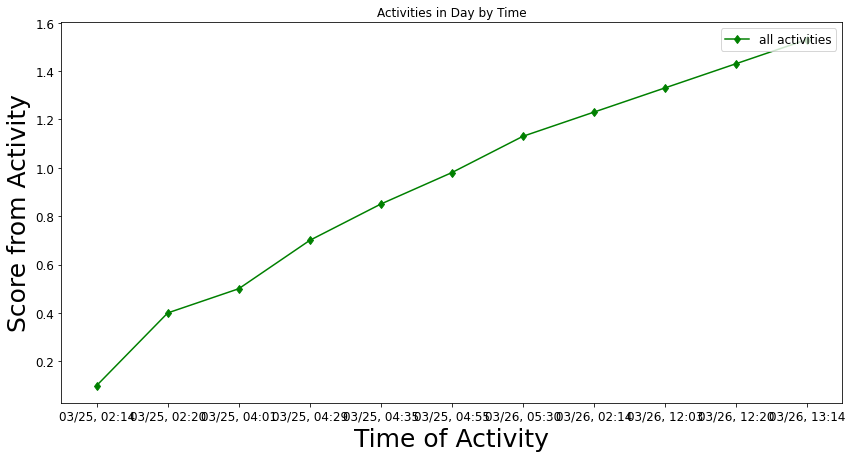

In [2]:
with open('my_database.yaml') as file:
    db = yaml.load(file, Loader=yaml.FullLoader)
    today = date.today()
    db = dict(db)
    x_timestamp = []
    y_score = []
    for date_of_logs in db['log']:
        for timestamp in db['log'][date_of_logs]:
            datetime = parser.parse(timestamp)
            time = datetime.time().strftime("%H:%M")
            for_graph = datetime.strftime("%m/%d, %H:%M")
            x_timestamp.append(for_graph)
            for action in db['log'][date_of_logs][timestamp]:
                value = db['log'][date_of_logs][timestamp][action]
                y_score.append(value)

    
plt.figure(figsize=(14,7))
plt.plot(x_timestamp, np.cumsum(y_score), color='Green', marker='d', label='all activities')
plt.ylabel("Score from Activity")
plt.xlabel("Time of Activity")
plt.title("Activities in Day by Time")
plt.legend(loc=1)
plt.show()


# Plotting Activities By Type

Here we will be grouping by type, we have:
- `water`, `phys`, `men`, `spir`, `emo`, `intel`

In [138]:
def py_time(time_string):
    datetime = parser.parse(time_string)
    time     = datetime.time().strftime("%H:%M")
    return time
    

with open('my_database.yaml') as file:
        db                  = yaml.load(file, Loader=yaml.FullLoader)
        structure_starts    = db['log']

        water_labels    = []
        water_y         = []
        phys_labels     = []
        phys_y          = []
        men_labels      = []
        men_y           = []
        spir_labels     = []
        spir_y          = []
        emo_labels      = []
        emo_y           = []
        intel_labels    = []
        intel_y         = []

        all_dates_with_data = []
        timestamps_in_day   = []

        for _date in structure_starts:
            all_dates_with_data.append(_date)
            timestamps = structure_starts[_date]
            for time in timestamps:
                timestamps_in_day.append(py_time(time))
                actions = timestamps[time]
                for action in actions:
                    value = actions[action]
                    if action == "water":
                        water_labels.append(action)
                        water_y.append(value)
                    elif action == "phys":
                        phys_y.append(value)
                        phys_labels.append(action)
                    elif action == "men":
                        men_y.append(value)
                        men_labels.append(action)
                    elif action == "spir":
                        spir_y.append(value)
                        spir_labels.append(action)
                    elif action == "emo":
                        emo_y.append(value)
                        emo_labels.append(action)
                    elif action == "intel":
                        intel_y.append(value)
                        intel_labels.append(action)

In [139]:
timestamps_for_phys = timestamps_in_day
timestamp_for_water = timestamps_in_day
timestamp_for_men   = timestamps_in_day
timestamp_for_emo   = timestamps_in_day
timestamp_for_intel = timestamps_in_day
timestamnp_for_spir = timestamps_in_day

timestamps_in_day,water_y = zip(*zip(timestamps_in_day, water_y))
timestamps_for_phys,phys_labels = zip(*zip(timestamps_for_phys, phys_y))
timestamp_for_men,men_labels = zip(*zip(timestamp_for_men, men_y))
if emo_labels:
    timestamp_for_emo,emo_labels = zip(*zip(timestamp_for_emo, emo_y))
if intel_labels:
    timestamp_for_intel,intel_labels = zip(*zip(timestamp_for_intel, intel_y))
if spir_labels:
    timestamnp_for_spir,spir_labels = zip(*zip(timestamnp_for_spir, spir_y))

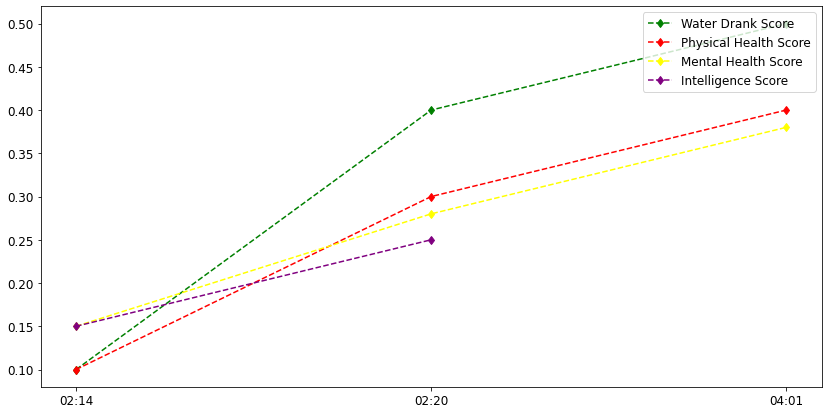

In [140]:
plt.figure(figsize=(14,7))
plt.plot(timestamps_in_day, np.cumsum(water_y), linestyle='--', color="Green", marker='d', label='Water Drank Score')
plt.plot(timestamps_for_phys, np.cumsum(phys_y), linestyle='--', color="Red", marker='d', label='Physical Health Score')
plt.plot(timestamp_for_men, np.cumsum(men_y), linestyle='--', color="Yellow", marker='d', label='Mental Health Score')
plt.plot(timestamp_for_intel, np.cumsum(intel_y), color="Purple", linestyle='--', marker='d', label='Intelligence Score')
plt.legend(loc=1)

plt.show()